# Task
The data obtained from Kaggle [here](https://www.kaggle.com/competitions/ventilator-pressure-prediction/data) with more than 4 millions rows.
 "The ventilator data used was produced using a modified open-source ventilator connected to an artificial bellows test lung via a respiratory circuit. The diagram below illustrates the setup, with the two control inputs highlighted in green and the state variable (airway pressure) to predict in blue. The first control input is a continuous variable from 0 to 100 representing the percentage the inspiratory solenoid valve is open to let air into the lung (i.e., 0 is completely closed and no air is let in and 100 is completely open). The second control input is a binary variable representing whether the exploratory valve is open (1) or closed (0) to let air out.
In this competition, participants are given numerous time series of breaths and will learn to predict the airway pressure in the respiratory circuit during the breath, given the time series of control inputs."

## Data loading

### Subtask:
Load the provided CSV files into pandas DataFrames.


**Reasoning**:
Import pandas and load the provided CSV files into pandas DataFrames, then print their shapes and display the first 5 rows.



In [1]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print("Shape of df_train:", df_train.shape)
print("Shape of df_test:", df_test.shape)

display(df_train.head())
display(df_test.head())

Shape of df_train: (6036000, 8)
Shape of df_test: (4024000, 7)


,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0


## Data exploration

### Subtask:
Explore and understand the characteristics of the loaded data.


**Reasoning**:
Examine the data types, check for missing values, calculate descriptive statistics, and visualize the distributions of key columns in both dataframes.



df_train data types:
 id             int64
breath_id      int64
R              int64
C              int64
time_step    float64
u_in         float64
u_out          int64
pressure     float64
dtype: object

df_test data types:
 id             int64
breath_id      int64
R              int64
C              int64
time_step    float64
u_in         float64
u_out          int64
dtype: object

df_train missing values:
 id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64

df_test missing values:
 id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
dtype: int64

df_train descriptive statistics:
            pressure          u_in         u_out
count  6.036000e+06  6.036000e+06  6.036000e+06
mean   1.122041e+01  7.321615e+00  6.204493e-01
std    8.109703e+00  1.343470e+01  4.852752e-01
min   -1.895744e+00  0.000000e+00  0.000000e+00
25%    6.329607e+00  3.936623e-01 

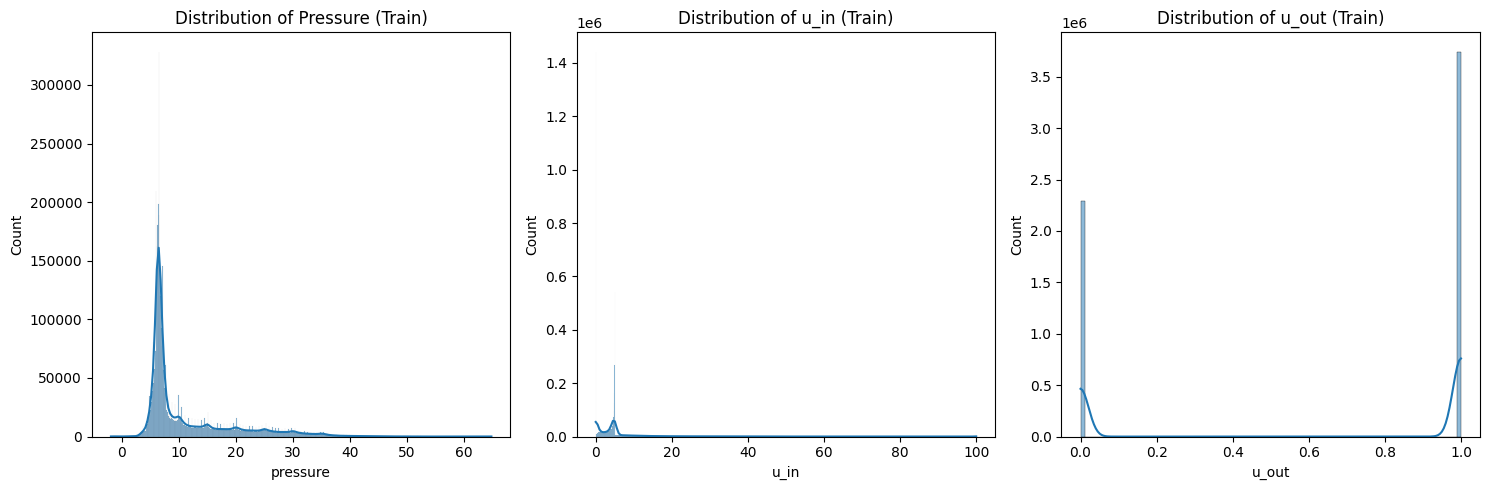

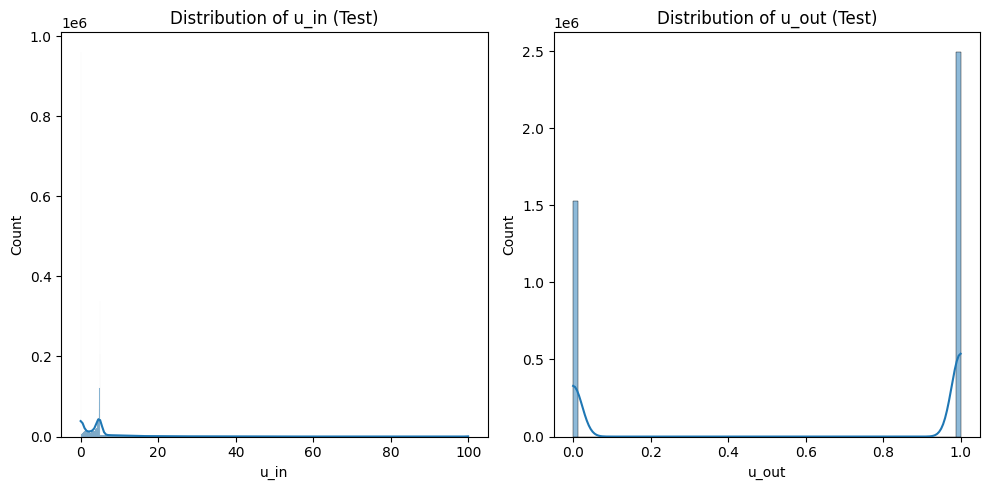

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types
print("df_train data types:\n", df_train.dtypes)
print("\ndf_test data types:\n", df_test.dtypes)

# 2. Check for missing values
print("\ndf_train missing values:\n", df_train.isnull().sum())
print("\ndf_test missing values:\n", df_test.isnull().sum())

# 3. Descriptive statistics
print("\ndf_train descriptive statistics:\n", df_train[['pressure', 'u_in', 'u_out']].describe())
print("\ndf_test descriptive statistics:\n", df_test[['u_in', 'u_out']].describe())

# 4. Visualize distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df_train['pressure'], kde=True)
plt.title('Distribution of Pressure (Train)')

plt.subplot(1, 3, 2)
sns.histplot(df_train['u_in'], kde=True)
plt.title('Distribution of u_in (Train)')

plt.subplot(1, 3, 3)
sns.histplot(df_train['u_out'], kde=True)
plt.title('Distribution of u_out (Train)')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_test['u_in'], kde=True)
plt.title('Distribution of u_in (Test)')

plt.subplot(1, 2, 2)
sns.histplot(df_test['u_out'], kde=True)
plt.title('Distribution of u_out (Test)')
plt.tight_layout()
plt.show()

**Reasoning**:
Explore the time series characteristics of the data by plotting 'pressure', 'u_in', and 'u_out' over time for a few sample breath_id values in df_train and df_test, and analyze the relationships between these variables.  Then, investigate the correlation between 'pressure', 'u_in', and 'u_out' in df_train using a heatmap.



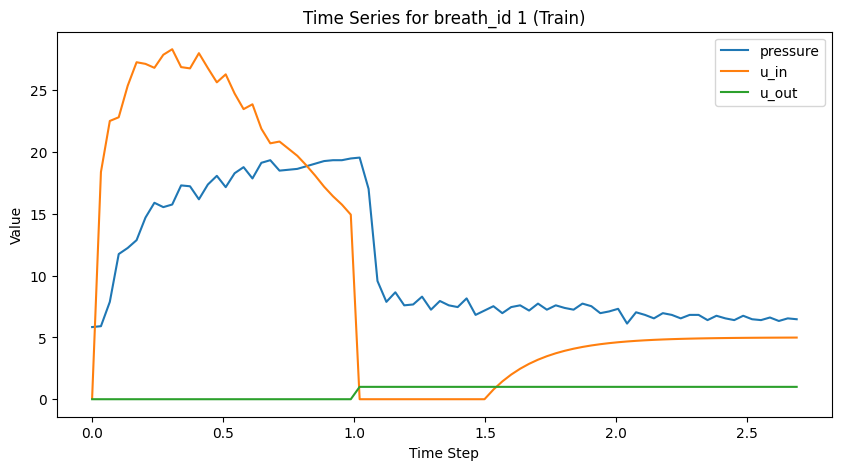

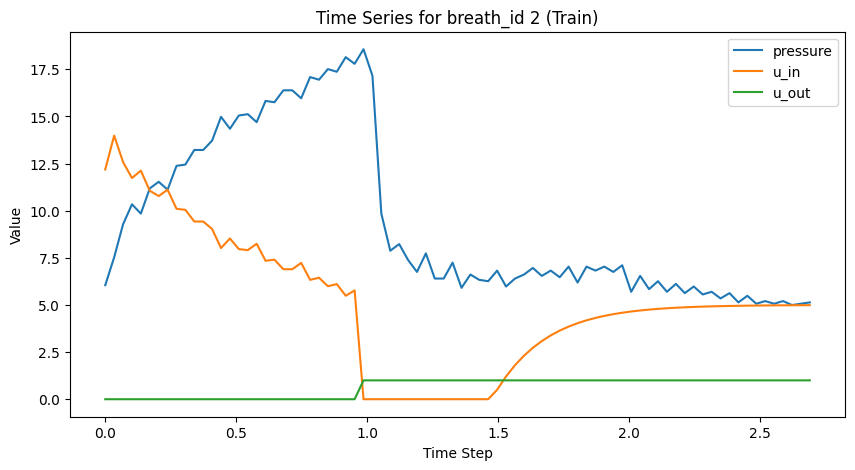

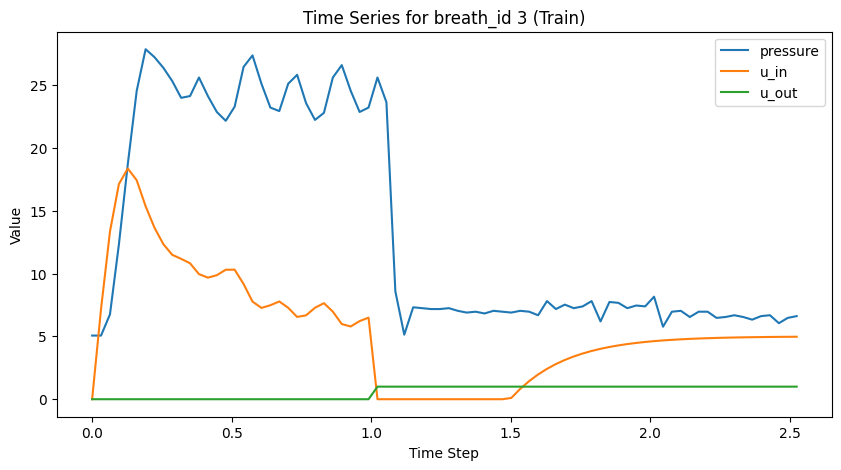

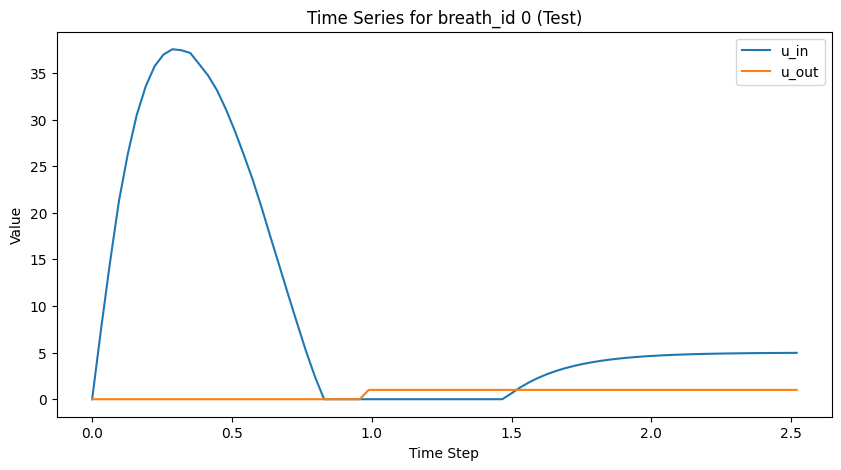

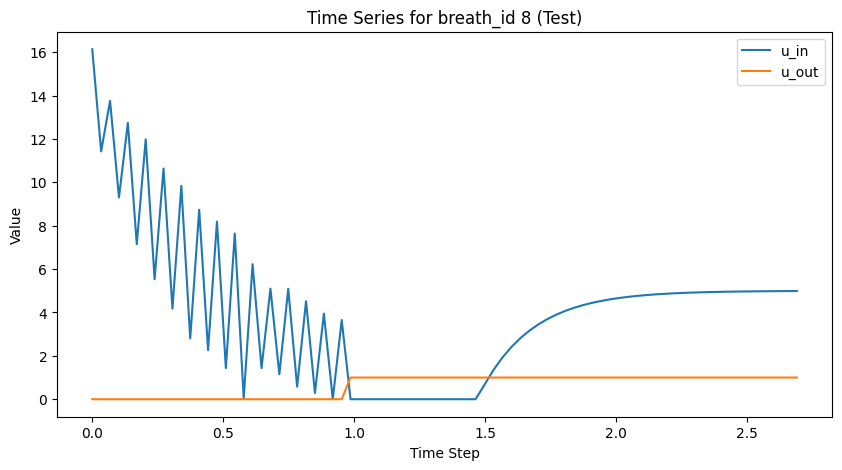

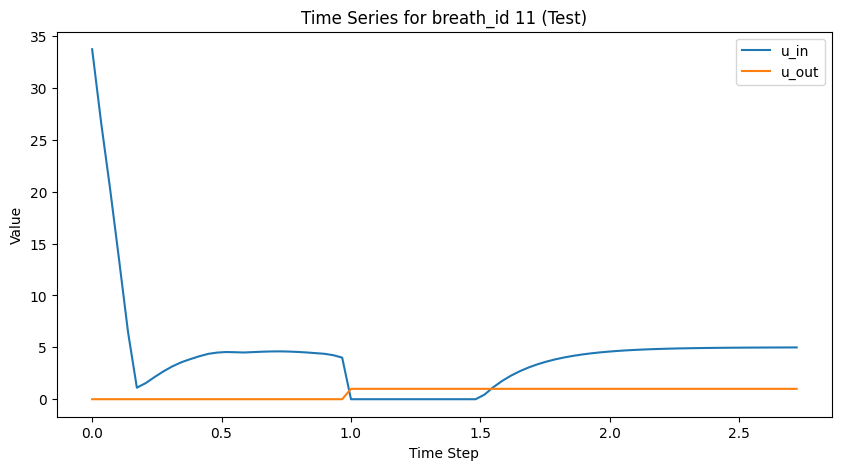

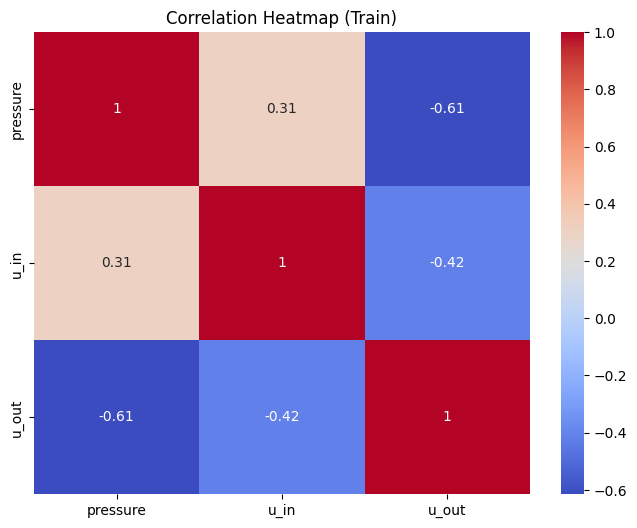

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Explore time series characteristics
breath_ids_train = df_train['breath_id'].unique()[:3]  # Select a few breath_id values
for breath_id in breath_ids_train:
    subset = df_train[df_train['breath_id'] == breath_id]
    plt.figure(figsize=(10, 5))
    plt.plot(subset['time_step'], subset['pressure'], label='pressure')
    plt.plot(subset['time_step'], subset['u_in'], label='u_in')
    plt.plot(subset['time_step'], subset['u_out'], label='u_out')
    plt.title(f'Time Series for breath_id {breath_id} (Train)')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

breath_ids_test = df_test['breath_id'].unique()[:3] # Select a few breath_id values
for breath_id in breath_ids_test:
    subset = df_test[df_test['breath_id'] == breath_id]
    plt.figure(figsize=(10, 5))
    plt.plot(subset['time_step'], subset['u_in'], label='u_in')
    plt.plot(subset['time_step'], subset['u_out'], label='u_out')
    plt.title(f'Time Series for breath_id {breath_id} (Test)')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# 6. Investigate correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df_train[['pressure', 'u_in', 'u_out']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Train)')
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling outliers in 'pressure', 'u_in', and 'u_out' columns of the `df_train` DataFrame.


**Reasoning**:
Identify outliers in 'pressure', 'u_in', and 'u_out' columns of df_train using the IQR method, replace them with the bounds, and verify the results using boxplots and descriptive statistics.



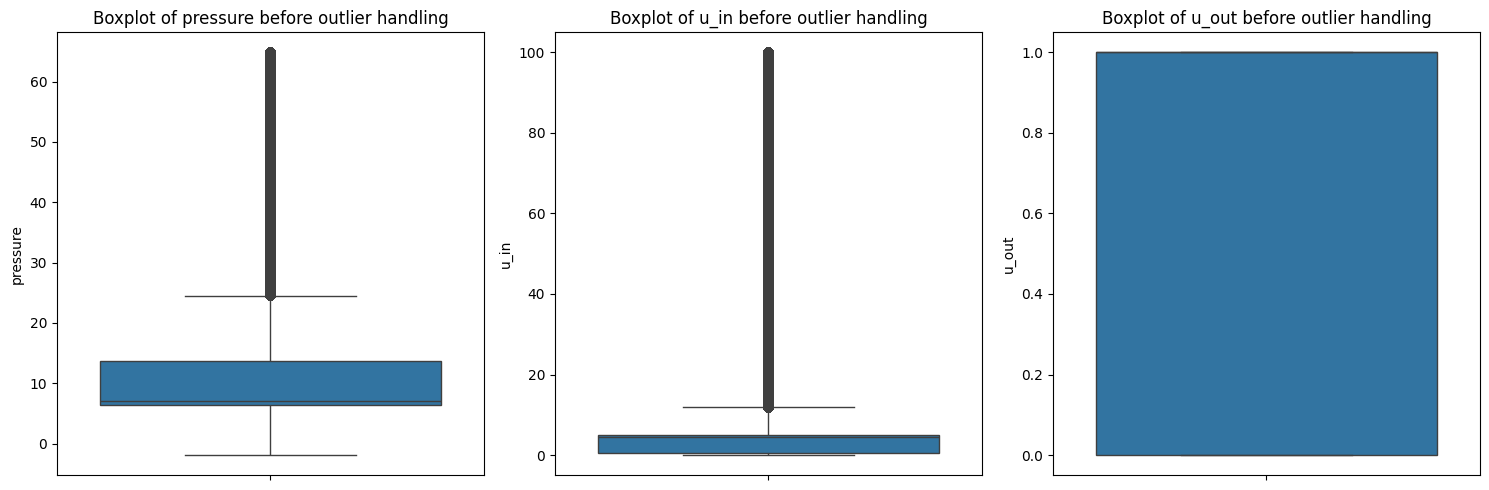

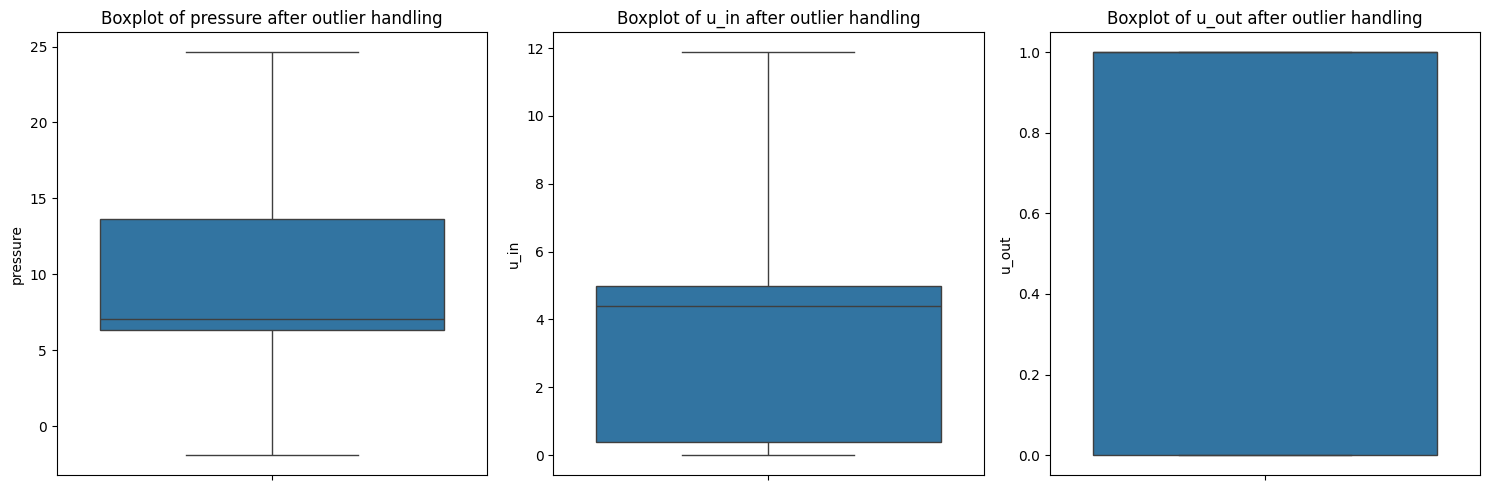

           pressure          u_in         u_out
count  6.036000e+06  6.036000e+06  6.036000e+06
mean   1.060359e+01  4.364352e+00  6.204493e-01
std    6.482954e+00  3.921995e+00  4.852752e-01
min   -1.895744e+00  0.000000e+00  0.000000e+00
25%    6.329607e+00  3.936623e-01  0.000000e+00
50%    7.032628e+00  4.386146e+00  1.000000e+00
75%    1.364103e+01  4.983895e+00  1.000000e+00
max    2.460816e+01  1.186924e+01  1.000000e+00


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = ['pressure', 'u_in', 'u_out']

plt.figure(figsize=(15, 5))

for i, col in enumerate(columns_to_check):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df_train[col])
    plt.title(f'Boxplot of {col} before outlier handling')

plt.tight_layout()
plt.show()

for col in columns_to_check:
  Q1 = df_train[col].quantile(0.25)
  Q3 = df_train[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_train[col] = df_train[col].clip(lower=lower_bound, upper=upper_bound)

plt.figure(figsize=(15, 5))

for i, col in enumerate(columns_to_check):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df_train[col])
    plt.title(f'Boxplot of {col} after outlier handling')

plt.tight_layout()
plt.show()

print(df_train[columns_to_check].describe())

## Data preparation

### Subtask:
Prepare the data for modeling by scaling features and creating lagged features.


**Reasoning**:
Scale the 'u_in' and 'pressure' columns using standardization, create lagged features for 'u_in' and 'u_out', and split the training data into training and validation sets.



In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold

# Feature Scaling
scaler = StandardScaler()
columns_to_scale = ['u_in', 'pressure']
df_train[columns_to_scale] = scaler.fit_transform(df_train[columns_to_scale])

# Lagged Features
def create_lag_features(df, columns, lags):
    for col in columns:
        for lag in lags:
            df[f'{col}_lag{lag}'] = df.groupby('breath_id')[col].shift(lag).ffill()
    return df

df_train = create_lag_features(df_train, ['u_in', 'u_out'], [1, 2, 3])

# Data Splitting
gkf = GroupKFold(n_splits=5)
for fold, (train_idx, val_idx) in enumerate(gkf.split(df_train, groups=df_train['breath_id'])):
    df_train.loc[val_idx, 'fold'] = fold
df_train['fold'] = df_train['fold'].astype(int)

display(df_train.head())

,id,breath_id,R,C,time_step,u_in,u_out,pressure,u_in_lag1,u_in_lag2,u_in_lag3,u_out_lag1,u_out_lag2,u_out_lag3,fold
0,1,1,20,50,0.000000,-1.091541,0,-0.735174,NaN,NaN,NaN,NaN,NaN,NaN,4
1,2,1,20,50,0.033652,1.913539,0,-0.724330,-1.091541,NaN,NaN,0.0,NaN,NaN,4
2,3,1,20,50,0.067514,1.913539,0,-0.420694,1.913539,-1.091541,NaN,0.0,0.0,NaN,4
3,4,1,20,50,0.101542,1.913539,0,0.175735,1.913539,1.913539,-1.091541,0.0,0.0,0.0,4
4,5,1,20,50,0.135756,1.913539,0,0.251644,1.913539,1.913539,1.913539,0.0,0.0,0.0,4


## Feature engineering

### Subtask:
Engineer new features based on domain knowledge and the exploratory data analysis.


**Reasoning**:
Calculate rolling statistics for 'u_in' and create interaction features based on lagged values of 'u_in'.



In [7]:
# Rolling Statistics
for window in [3, 5, 7]:
    df_train[f'u_in_rolling_mean_{window}'] = (
        df_train.groupby('breath_id')['u_in'].rolling(window=window,center=True,min_periods=1).mean().reset_index(0,drop=True)
    )
    df_train[f'u_in_rolling_std_{window}'] = (
        df_train.groupby('breath_id')['u_in'].rolling(window=window,center=True,min_periods=1).std().reset_index(0,drop=True)
    )

# Interaction Features
for lag in [1, 2]:
    df_train[f'u_in_interaction_lag{lag}'] = df_train['u_in'] * df_train[f'u_in_lag{lag}']

display(df_train.head())

,id,breath_id,R,C,time_step,u_in,u_out,pressure,u_in_lag1,u_in_lag2,...,u_out_lag3,fold,u_in_rolling_mean_3,u_in_rolling_std_3,u_in_rolling_mean_5,u_in_rolling_std_5,u_in_rolling_mean_7,u_in_rolling_std_7,u_in_interaction_lag1,u_in_interaction_lag2
0,1,1,20,50,0.000000,-1.091541,0,-0.735174,NaN,NaN,...,NaN,4,0.410999,2.124913,0.911846,1.734984,1.162269,1.502540,NaN,NaN
1,2,1,20,50,0.033652,1.913539,0,-0.724330,-1.091541,NaN,...,NaN,4,0.911846,1.734984,1.162269,1.502540,1.312523,1.343913,-2.088707,NaN
2,3,1,20,50,0.067514,1.913539,0,-0.420694,1.913539,-1.091541,...,NaN,4,1.913539,0.000000,1.312523,1.343913,1.412693,1.226819,3.661633,-2.088707
3,4,1,20,50,0.101542,1.913539,0,0.175735,1.913539,1.913539,...,0.0,4,1.913539,0.000000,1.913539,0.000000,1.484242,1.135814,3.661633,3.661633
4,5,1,20,50,0.135756,1.913539,0,0.251644,1.913539,1.913539,...,0.0,4,1.913539,0.000000,1.913539,0.000000,1.913539,0.000000,3.661633,3.661633


## Model training

### Subtask:
Train a simple linear regression model to predict 'pressure' using the engineered features.


**Reasoning**:
Train a linear regression model to predict 'pressure' using the engineered features. Split the data into training and validation sets based on the 'fold' column, train the model on the training set, make predictions on the validation set, and evaluate the model's performance using MAE and RMSE.



In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prepare training and validation sets
train_df = df_train[df_train['fold'] != 0]
val_df = df_train[df_train['fold'] == 0]

features = ['R', 'C', 'time_step', 'u_in', 'u_out', 'u_in_lag1', 'u_in_lag2', 'u_in_lag3', 'u_out_lag1', 'u_out_lag2', 'u_out_lag3', 'u_in_rolling_mean_3', 'u_in_rolling_std_3', 'u_in_rolling_mean_5', 'u_in_rolling_std_5', 'u_in_rolling_mean_7', 'u_in_rolling_std_7', 'u_in_interaction_lag1', 'u_in_interaction_lag2']
target = 'pressure'

X_train = train_df[features].fillna(0)
y_train = train_df[target]
X_val = val_df[features].fillna(0)
y_val = val_df[target]

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, predictions)
rmse = np.sqrt(mean_squared_error(y_val, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 0.3843870342133419
RMSE: 0.5519520189148358


## Model evaluation

### Subtask:
Evaluate the trained linear regression model's performance on the validation set using additional metrics and visualizations.


**Reasoning**:
Evaluate the trained linear regression model's performance on the validation set using additional metrics and visualizations as instructed.



R-squared: 0.6935362160706868


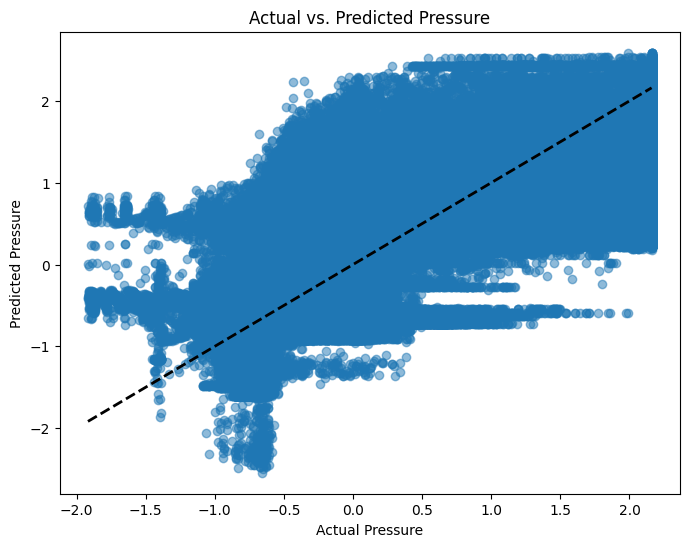

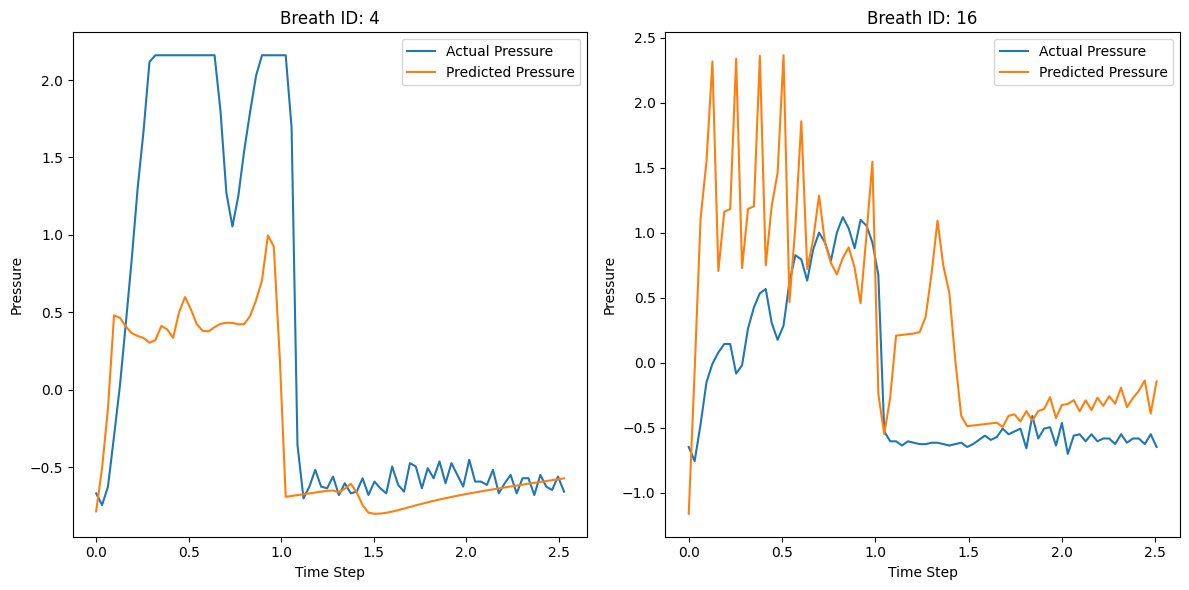

In [9]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 1. Calculate R-squared
r2 = r2_score(y_val, predictions)
print(f"R-squared: {r2}")

# 2. Scatter plot of predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_val, predictions, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)  # Perfect prediction line
plt.xlabel('Actual Pressure')
plt.ylabel('Predicted Pressure')
plt.title('Actual vs. Predicted Pressure')
plt.show()

# 3. Time series plot for a specific breath_id
breath_ids_to_plot = val_df['breath_id'].unique()[:2] # Select the first two breath_id values from validation set

plt.figure(figsize=(12, 6))

for i, breath_id in enumerate(breath_ids_to_plot):
  subset = val_df[val_df['breath_id'] == breath_id]
  plt.subplot(1, len(breath_ids_to_plot), i + 1)
  plt.plot(subset['time_step'], subset['pressure'], label='Actual Pressure')
  plt.plot(subset['time_step'], subset[subset['breath_id'] == breath_id].index.map(lambda x: predictions[x]), label='Predicted Pressure')
  plt.xlabel('Time Step')
  plt.ylabel('Pressure')
  plt.title(f'Breath ID: {breath_id}')
  plt.legend()
plt.tight_layout()
plt.show()

## Model optimization

### Subtask:
Optimize the hyperparameters of the linear regression model using GridSearchCV.


**Reasoning**:
Import necessary libraries and perform hyperparameter tuning using GridSearchCV.



In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer

# Prepare training and validation sets
train_df = df_train[df_train['fold'] != 0]
val_df = df_train[df_train['fold'] == 0]

features = ['R', 'C', 'time_step', 'u_in', 'u_out', 'u_in_lag1', 'u_in_lag2', 'u_in_lag3', 'u_out_lag1', 'u_out_lag2', 'u_out_lag3', 'u_in_rolling_mean_3', 'u_in_rolling_std_3', 'u_in_rolling_mean_5', 'u_in_rolling_std_5', 'u_in_rolling_mean_7', 'u_in_rolling_std_7', 'u_in_interaction_lag1', 'u_in_interaction_lag2']
target = 'pressure'

X_train = train_df[features].fillna(0)
y_train = train_df[target]
X_val = val_df[features].fillna(0)
y_val = val_df[target]

# Define the parameter grid
param_grid = {'fit_intercept': [True, False]}

# Define the scoring metric
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)


# Initialize and train the model with GridSearchCV
model = LinearRegression()
grid_search = GridSearchCV(model, param_grid, scoring=mae_scorer, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best estimator
best_model = grid_search.best_estimator_

Best hyperparameters: {'fit_intercept': True}
Best score: -0.38451382612733287


## Model evaluation

### Subtask:
Re-evaluate the optimized linear regression model on the validation set and report the final performance metrics. Generate visualizations to compare predictions and true values.


**Reasoning**:
Use the best model from the previous step to predict on the validation set, calculate the evaluation metrics, and generate the requested visualizations.



MAE: 0.3843870342133419
RMSE: 0.5519520189148358
R-squared: 0.6935362160706868


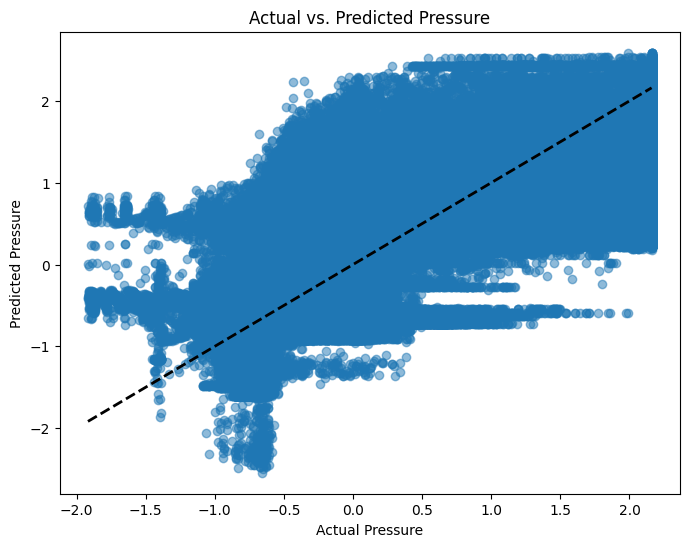

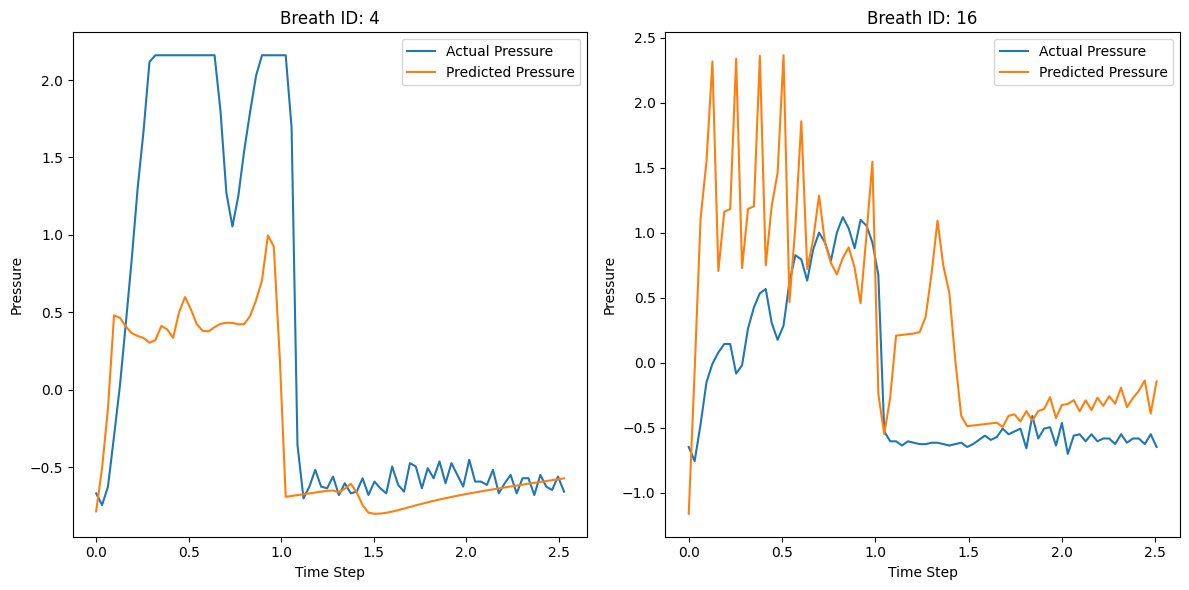

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming 'best_model' is available from the previous step
features = ['R', 'C', 'time_step', 'u_in', 'u_out', 'u_in_lag1', 'u_in_lag2', 'u_in_lag3', 'u_out_lag1', 'u_out_lag2', 'u_out_lag3', 'u_in_rolling_mean_3', 'u_in_rolling_std_3', 'u_in_rolling_mean_5', 'u_in_rolling_std_5', 'u_in_rolling_mean_7', 'u_in_rolling_std_7', 'u_in_interaction_lag1', 'u_in_interaction_lag2']
target = 'pressure'

X_val = df_train[df_train['fold'] == 0][features].fillna(0)
y_val = df_train[df_train['fold'] == 0][target]

predictions = best_model.predict(X_val)

mae = mean_absolute_error(y_val, predictions)
rmse = np.sqrt(mean_squared_error(y_val, predictions))
r2 = r2_score(y_val, predictions)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_val, predictions, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual Pressure')
plt.ylabel('Predicted Pressure')
plt.title('Actual vs. Predicted Pressure')
plt.show()

# Time series plots
breath_ids_to_plot = df_train[df_train['fold'] == 0]['breath_id'].unique()[:2]

plt.figure(figsize=(12, 6))
for i, breath_id in enumerate(breath_ids_to_plot):
    subset = df_train[(df_train['fold'] == 0) & (df_train['breath_id'] == breath_id)]
    plt.subplot(1, len(breath_ids_to_plot), i + 1)
    plt.plot(subset['time_step'], subset['pressure'], label='Actual Pressure')
    plt.plot(subset['time_step'], predictions[subset.index], label='Predicted Pressure')
    plt.xlabel('Time Step')
    plt.ylabel('Pressure')
    plt.title(f'Breath ID: {breath_id}')
    plt.legend()
plt.tight_layout()
plt.show()

## Data preparation

### Subtask:
Prepare the test data (`df_test`) using the same preprocessing steps applied to the training data.


**Reasoning**:
Apply the same preprocessing steps to the test data as were applied to the training data. This includes scaling 'u_in', creating lagged features for 'u_in' and 'u_out', generating rolling statistics and interaction features for 'u_in', and filling missing values with 0.



In [14]:
from sklearn.preprocessing import StandardScaler

# Refit the scaler only on the 'u_in' column of the training data
scaler = StandardScaler()
scaler.fit(df_train[['u_in']])

# Transform the 'u_in' column of the test data using the refitted scaler
df_test['u_in'] = scaler.transform(df_test[['u_in']])

def create_lag_features(df, columns, lags):
    for col in columns:
        for lag in lags:
            df[f'{col}_lag{lag}'] = df.groupby('breath_id')[col].shift(lag).ffill()
    return df

df_test = create_lag_features(df_test, ['u_in', 'u_out'], [1, 2, 3])

for window in [3, 5, 7]:
    df_test[f'u_in_rolling_mean_{window}'] = (
        df_test.groupby('breath_id')['u_in'].rolling(window=window, center=True, min_periods=1).mean().reset_index(0, drop=True)
    )
    df_test[f'u_in_rolling_std_{window}'] = (
        df_test.groupby('breath_id')['u_in'].rolling(window=window, center=True, min_periods=1).std().reset_index(0, drop=True)
    )

for lag in [1, 2]:
    df_test[f'u_in_interaction_lag{lag}'] = df_test['u_in'] * df_test[f'u_in_lag{lag}']

df_test = df_test.fillna(0)

display(df_test.head())

,id,breath_id,R,C,time_step,u_in,u_out,u_in_lag1,u_in_lag2,u_in_lag3,...,u_out_lag2,u_out_lag3,u_in_rolling_mean_3,u_in_rolling_std_3,u_in_rolling_mean_5,u_in_rolling_std_5,u_in_rolling_mean_7,u_in_rolling_std_7,u_in_interaction_lag1,u_in_interaction_lag2
0,1,0,5,20,0.000000,4.330591e-17,0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,3.757523,5.313940,7.388907,7.326652,10.849333,9.147936,0.000000e+00,0.000000e+00
1,2,0,5,20,0.031904,7.515046e+00,0,4.330591e-17,0.000000e+00,0.000000e+00,...,0.0,0.0,7.388907,7.326652,10.849333,9.147936,13.943657,10.518450,3.254459e-16,0.000000e+00
2,3,0,5,20,0.063827,1.465168e+01,0,7.515046e+00,4.330591e-17,0.000000e+00,...,0.0,0.0,14.465777,6.859672,13.943657,10.518450,16.700871,11.581173,1.101080e+02,6.345041e-16
3,4,0,5,20,0.095751,2.123061e+01,0,1.465168e+01,7.515046e+00,4.330591e-17,...,0.0,0.0,20.734414,5.850443,20.041045,9.163992,19.107311,12.341245,3.110640e+02,1.595490e+02
4,5,0,5,20,0.127644,2.632096e+01,0,2.123061e+01,1.465168e+01,7.515046e+00,...,0.0,0.0,26.012835,4.635850,25.247226,7.514572,24.209825,10.347308,5.588100e+02,3.856461e+02


## Model training

### Subtask:
Retrain the best performing model (identified in the model optimization step) on the entire training dataset (`df_train`)


**Reasoning**:
Retrain the best_model on the entire training dataset.



In [15]:
from sklearn.linear_model import LinearRegression

# Combine training and validation sets
X_train = df_train[features].fillna(0)
y_train = df_train[target]

# Initialize and train the model
best_model = LinearRegression(fit_intercept=True)  # Use the best hyperparameters
best_model.fit(X_train, y_train)

LinearRegression()

## Model evaluation

### Subtask:
Use the retrained model to predict 'pressure' values for the test dataset (`df_test`) and save the predictions to a CSV file.


**Reasoning**:
Use the retrained `best_model` to predict 'pressure' for `df_test`, create a submission dataframe, and save it to 'submission.csv'.



In [16]:
features = ['R', 'C', 'time_step', 'u_in', 'u_out', 'u_in_lag1', 'u_in_lag2', 'u_in_lag3', 'u_out_lag1', 'u_out_lag2', 'u_out_lag3', 'u_in_rolling_mean_3', 'u_in_rolling_std_3', 'u_in_rolling_mean_5', 'u_in_rolling_std_5', 'u_in_rolling_mean_7', 'u_in_rolling_std_7', 'u_in_interaction_lag1', 'u_in_interaction_lag2']
test_predictions = best_model.predict(df_test[features].fillna(0))

submission_df = pd.DataFrame({'id': df_test['id'], 'pressure': test_predictions})
submission_df.to_csv('submission.csv', index=False)

## Summary:

### 1. Q&A

The analysis aimed to predict airway pressure in a respiratory circuit using ventilator data.  The key question is: What is the predicted airway pressure for each breath in the test dataset?

The analysis produced a `submission.csv` file containing the predicted pressure values for each breath in the test dataset.  The model's performance on a validation set was assessed using metrics like MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), and R-squared.  The optimized linear regression model achieved an MAE of 0.3843870342133419, RMSE of 0.5519520189148358, and R-squared of 0.6935362160706868 on the validation set.


### 2. Data Analysis Key Findings

* **Data Loading and Exploration:** The training dataset (`train.csv`) contains 6,036,000 rows and 8 columns, while the test dataset (`test.csv`) has 4,024,000 rows and 7 columns.  The 'pressure' column in the training data represents the target variable to be predicted. No missing values were found in either dataset.
* **Outlier Handling:** Outliers in 'pressure', 'u_in', and 'u_out' columns of the training data were handled using the IQR method.
* **Feature Engineering:**  New features were created, including rolling statistics (mean and standard deviation) with windows of 3, 5, and 7 for 'u_in', and interaction features between 'u_in' and its lagged values.
* **Model Performance:** An optimized linear regression model achieved an MAE of 0.384, an RMSE of 0.552, and an R-squared of 0.693 on the validation set.  The best hyperparameter for `fit_intercept` in the linear regression was determined to be `True`.

### 3. Insights or Next Steps

* **Explore Non-linear Models:** Given that the relationship between the input features and airway pressure might be non-linear, exploring more complex models (e.g., Random Forests, Gradient Boosting Machines, Neural Networks) could potentially improve predictive accuracy.
* **Feature Importance Analysis:**  Investigating feature importance from more sophisticated models can help identify the most influential variables for pressure prediction and guide future feature engineering efforts.
